In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test_data=pd.read_csv(r'/content/Kaggle_Test_Dataset_v2.csv')

/tmp/ipython-input-3382744365.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data=pd.read_csv(r'/content/Kaggle_Test_Dataset_v2.csv')


In [3]:
train_data=pd.read_csv(r'/content/Kaggle_Training_Dataset_v2.csv')

/tmp/ipython-input-783185626.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data=pd.read_csv(r'/content/Kaggle_Training_Dataset_v2.csv')


In [4]:
train_data.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [5]:
train_data.shape

(1687861, 23)

In [6]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
national_inv,1687860.0,496.111782,29615.233831,-27256.0,4.00,15.00,80.00,12334404.0
lead_time,1586967.0,7.872267,7.056024,0.0,4.00,8.00,9.00,52.0
in_transit_qty,1687860.0,44.052022,1342.741731,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1687860.0,178.119284,5026.553102,0.0,0.00,0.00,4.00,1427612.0
forecast_6_month,1687860.0,344.986664,9795.151861,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1687860.0,506.364431,14378.923562,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1687860.0,55.926069,1928.195879,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1687860.0,175.025930,5192.377625,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1687860.0,341.728839,9613.167104,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1687860.0,525.269701,14838.613523,0.0,0.00,4.00,47.00,3205172.0


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [8]:
train_data.shape

(1687861, 23)

In [9]:
train_data.isnull().sum()

,0
sku,0
national_inv,1
lead_time,100894
in_transit_qty,1
forecast_3_month,1
forecast_6_month,1
forecast_9_month,1
sales_1_month,1
sales_3_month,1
sales_6_month,1


In [10]:
# Correct calculation for null percentage
null_count = train_data.lead_time.isnull().sum()
total_rows = len(train_data)

lead_time_null_value_percentage = (null_count / total_rows) * 100

In [11]:
lead_time_null_value_percentage

np.float64(5.977624934754698)

In [12]:
data_to_impute=train_data[train_data.isnull().sum()]==1

In [13]:
data_to_impute.columns

Index(['national_inv', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [28]:
# train_data=train_data.loc[:, train_data.isnull().sum() == 1]

data_to_impute = train_data.loc[:, train_data.isnull().sum() == 1]
train_data_null_dropped = data_to_impute.dropna(how='all')

In [36]:
for col in data_to_impute.columns:
    if data_to_impute[col].dtype in ['float64', 'int64']:
        mean_val = data_to_impute[col].mean()
        train_data[col] = train_data[col].fillna(mean_val)
    else:
        # For non-numeric columns, fill with the mode or a placeholder
        # Here, we'll fill with the mode as an example
        mode_val = data_to_impute[col].mode()[0] if not data_to_impute[col].mode().empty else 'Missing'
        train_data[col] = train_data[col].fillna(mode_val)

In [37]:
train_data.isnull().sum()

,0
sku,0
national_inv,0
lead_time,100894
in_transit_qty,0
forecast_3_month,0
forecast_6_month,0
forecast_9_month,0
sales_1_month,0
sales_3_month,0
sales_6_month,0


In [38]:
train_data.lead_time.value_counts()

,count
lead_time,
8.0,682186
2.0,337402
12.0,199700
4.0,128537
9.0,123649
52.0,30113
3.0,16253
10.0,14192
0.0,10511


In [39]:
lead_mean=train_data['lead_time'].mean()
train_data=train_data.fillna(lead_mean)

In [40]:
train_data.isnull().sum()

,0
sku,0
national_inv,0
lead_time,0
in_transit_qty,0
forecast_3_month,0
forecast_6_month,0
forecast_9_month,0
sales_1_month,0
sales_3_month,0
sales_6_month,0


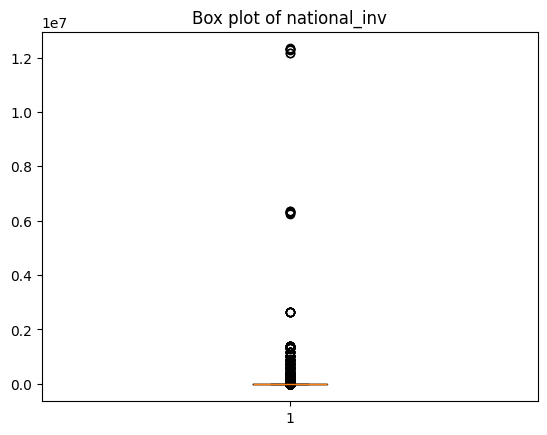

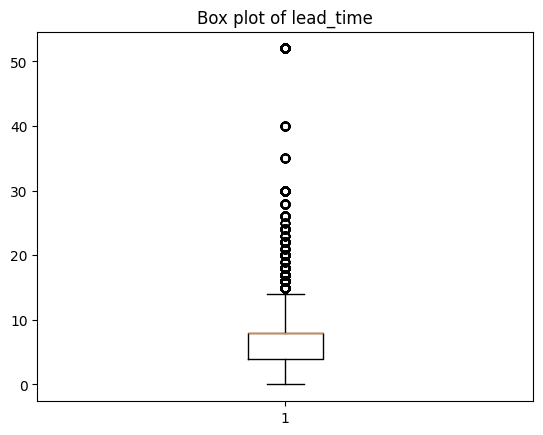

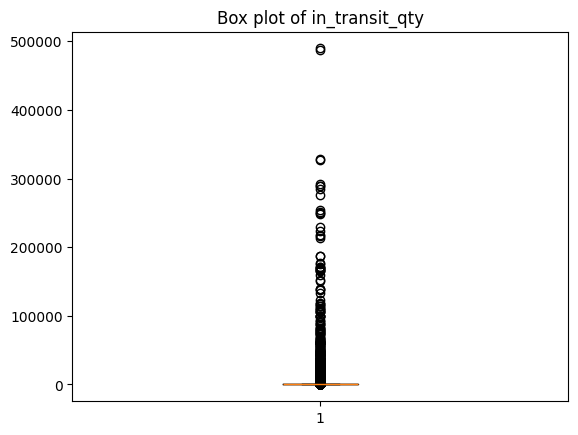

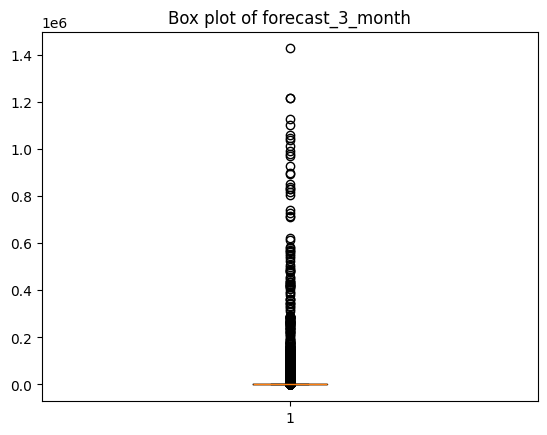

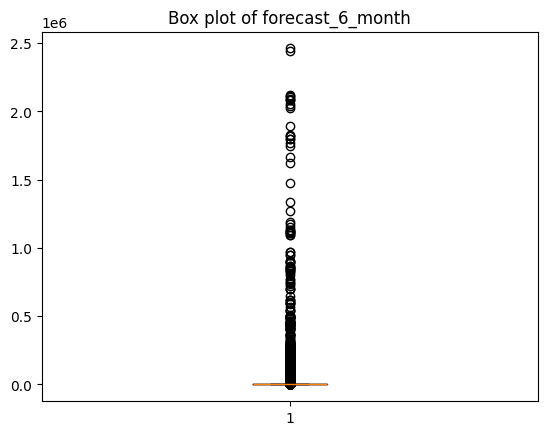

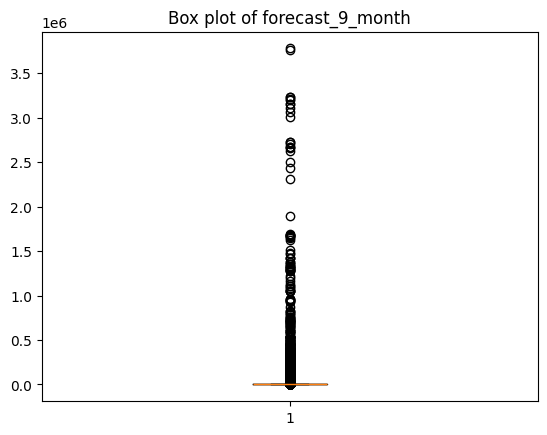

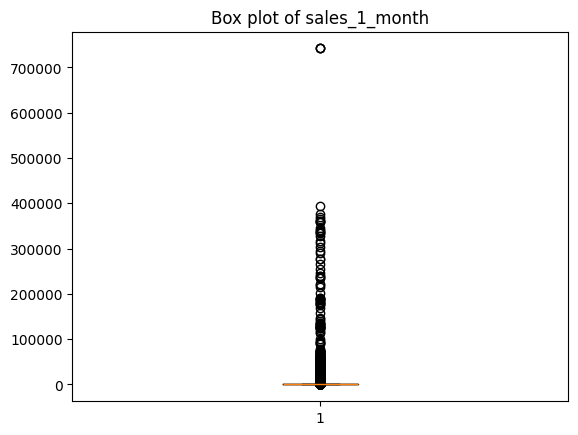

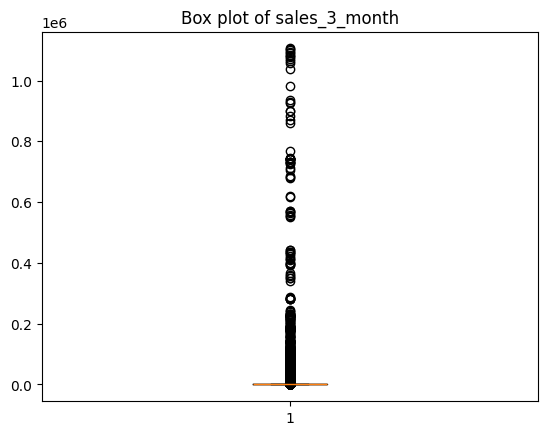

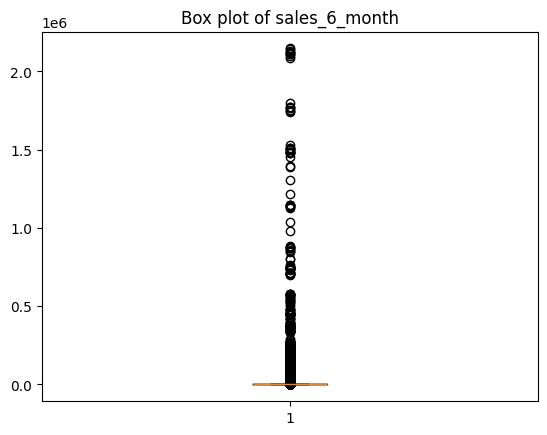

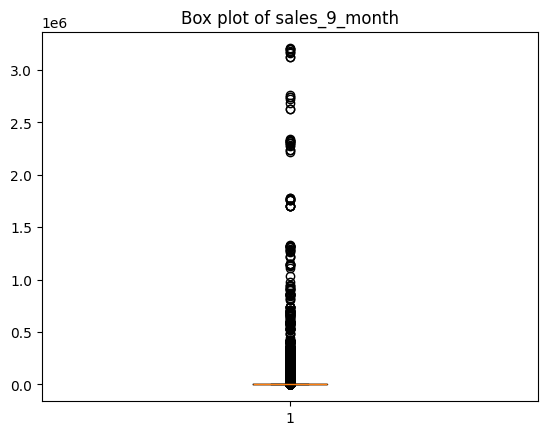

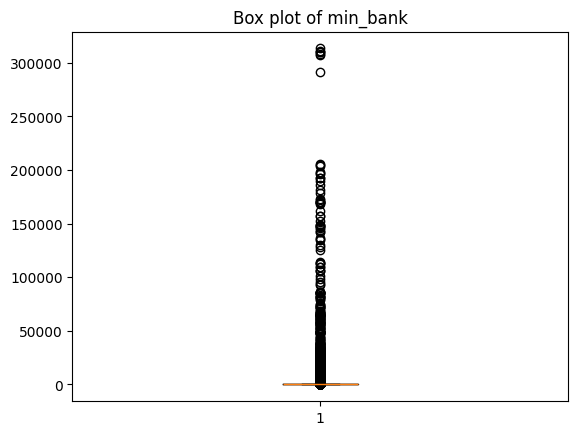

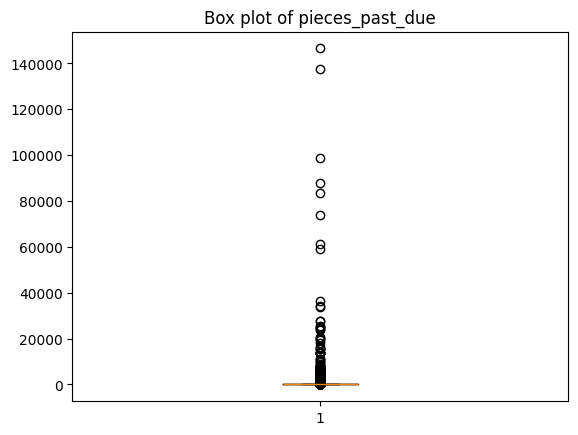

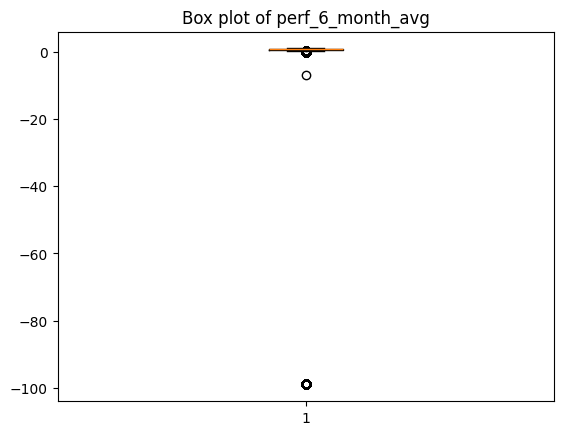

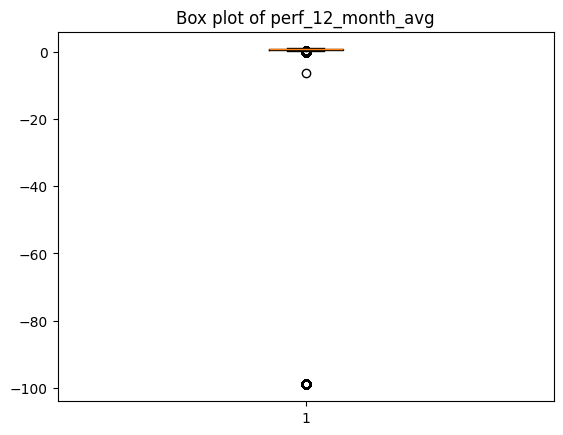

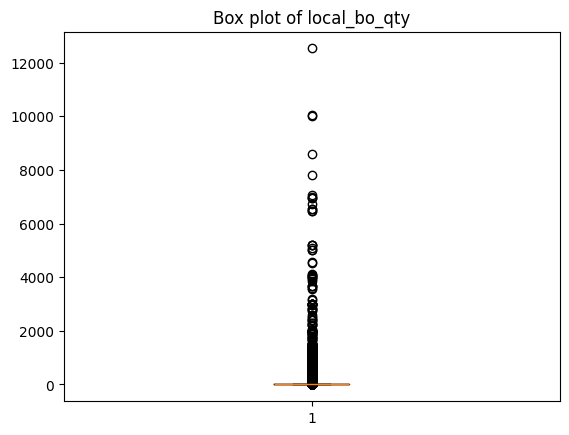

In [42]:
numeric_df=train_data.select_dtypes(include='number')
for i in numeric_df.columns:
  plt.figure()
  plt.boxplot(train_data[i])
  plt.title(f'Box plot of {i}')
  plt.show()


Outlier detection and imputation

In [72]:
outliers_dict = {}
numeric_cols = train_data.select_dtypes(include=np.number).columns

for col in numeric_cols:
    Q1 = train_data[col].quantile(0.25)
    Q3 = train_data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = train_data[(train_data[col] < lower_bound) | (train_data[col] > upper_bound)]
    outliers_dict[col] = outliers

# Now you can access the outliers for each numeric column from the outliers_dict
# For example, to see outliers in 'national_inv':
# print(outliers_dict['national_inv'])

In [75]:
outliers.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [76]:
df=train_data.copy()

In [78]:
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        mean_val = df[col].mean()
        df[col].fillna(mean_val, inplace=True) # Use inplace=True to modify in place

/tmp/ipython-input-637934271.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_val, inplace=True) # Use inplace=True to modify in place


In [79]:
cat_col=outliers.select_dtypes(include=['object', 'category'])
cat_col.columns

Index(['sku', 'potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [80]:
for col in cat_col.columns:
    if df[col].dtype in ['object', 'category']:
        mean_val = df[col].mode()[0]
        df[col].fillna(mean_val, inplace=True)

/tmp/ipython-input-1265270250.py:3: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  mean_val = df[col].mode()[0]
/tmp/ipython-input-1265270250.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_val, inplace=True)


In [81]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
